# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Submitted by: Samir Epili (se7982) and Siddhant Chauhan (sc54788)</p>

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

##Answer

A senior data analyst at Snowflake emphasized data scientists spend their time on working on techincal terminology and this can over time lead to constant frustration. Over a long time the insights to a correct problem are discovered but what happens in the problem is solved but in the wrong way. This leads to no one being able to use the insights as they are not communicated properly and as the saying at Snowflake went "We don't fail because of the math... we fail because we don't understand how people will use the math."

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using m
aximum likelihood estimation (MLE))."

## Answer

1. Coin A is more likely because for Coin A: P(HTHHTT) = 0.5^6 = 0.016. On the other hand, for Coin B: P(HTHHTT) = 0.75^3*0.5^3 = 0.007.

2. Assuming a binomial distribution and using MLE:

  $L(p)= f_D(H=3|p) = \binom 63p^3(1-p)^3$

  Set derivative to 0 to find max

  $\frac{\partial}{\partial p}\binom 63p^3(1-p)^3 = 0$

  $3p^2(1-p)^3 - 3p^3(1-p)^2 = 0$

  $3p^2(1-p)^2[(1-2p)] = 0$

  Thus, the maximum likelihood of P*(H) is 0.5.

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("/content/data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [ ]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

In [ ]:
print('Shape: ', X.shape)
X.iloc[:5]

Shape:  (158, 5)


,Length1,Length2,Length3,Height,Width
Species,,,,,
Bream,23.2,25.4,30.0,11.5200,4.0200
Bream,24.0,26.3,31.2,12.4800,4.3056
Bream,23.9,26.5,31.1,12.3778,4.6961
Bream,26.3,29.0,33.5,12.7300,4.4555
Bream,26.5,29.0,34.0,12.4440,5.1340


b.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
reg = linear_model.LinearRegression()
reg.fit(X,y)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean absolute error
weight_pred = reg.predict(X)
print('Mean absolute error: %.2f'
      % mean_absolute_error(y, weight_pred))

Coefficients: 
 [ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]
Mean absolute error: 91.71


c.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean absolute error
weight_pred2 = reg2.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, weight_pred2))
print('Coefficient of determination: %.2f' % r2_score(y_test, weight_pred2))

Coefficients: 
 [ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]
Mean absolute error: 97.82
Coefficient of determination: 0.90


The MAE using the train/test split is higher compared to that of the regression using the entire dataset. This is expected because the trained model is fit to only 75% of the data, meaning it only minimizes the error to yield the MLE solution for the training set. Therefore, this model has beta values that are farther from the ideal perfect model, and applying it to a test set of new data points will result in an error higher than when fitting a model with all the data.

d.

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns

corr_train = X_train.corr(method='pearson')
print(corr_train)

          Length1   Length2   Length3    Height     Width
Length1  1.000000  0.999415  0.990696  0.594366  0.843893
Length2  0.999415  1.000000  0.993202  0.612155  0.851321
Length3  0.990696  0.993202  1.000000  0.681548  0.857178
Height   0.594366  0.612155  0.681548  1.000000  0.775991
Width    0.843893  0.851321  0.857178  0.775991  1.000000


Only height has a Pearson correlation coefficient of less than 0.8 with respect to Length2

          Length2
Length1  0.999415
Length2  1.000000
Length3  0.993202
Width    0.851321

The pairwise plot supports the results of the correlation matrix as height is the only visably uncorrelated feature in the plot.


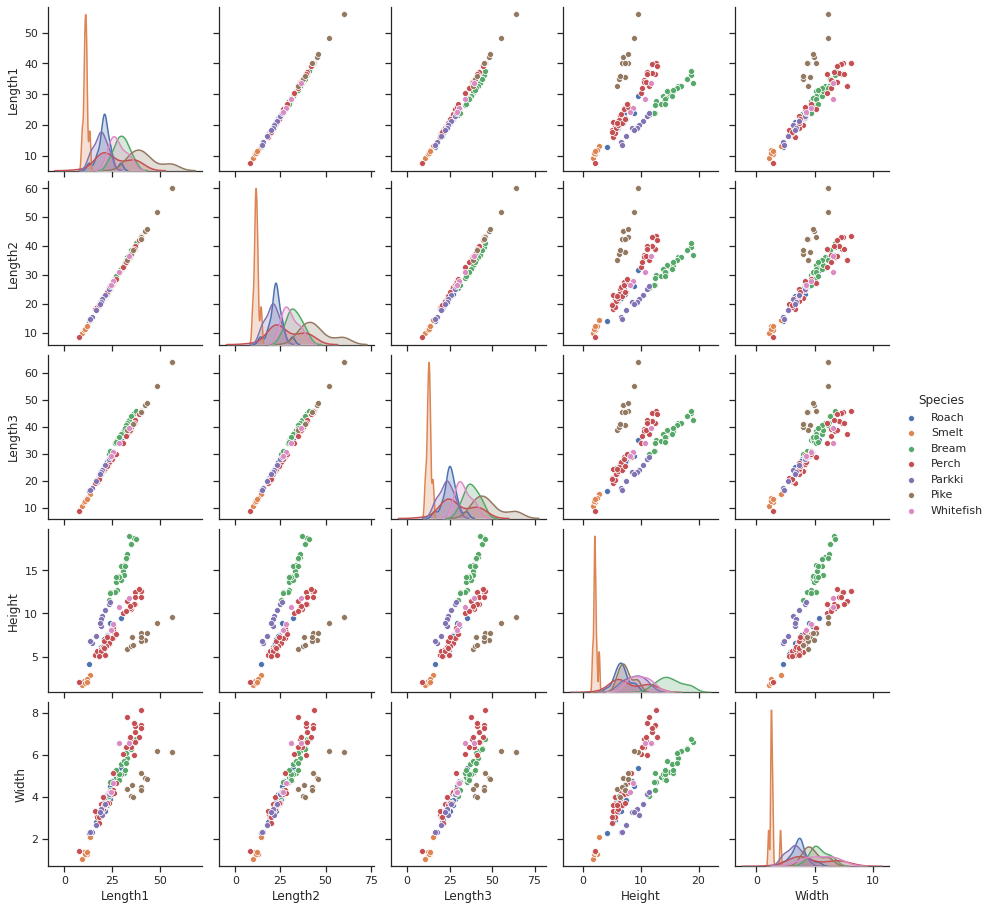

In [ ]:

# get pearson coefficient matrix
corrMat = X_train.corr()
print(corrMat[corrMat['Length2'] > 0.8][['Length2']])

# plot pairplot
sns.set(style="ticks", color_codes=True)
Xplot = X_train.reset_index()
g = sns.pairplot(Xplot, hue='Species')

# analysis
print('\nThe pairwise plot supports the results of the correlation matrix as height is the only visably uncorrelated feature in the plot.')

The pairplot supports our findings in the correlation matrix because Length2 and Height do not show a very strong linear relationship.

e.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'Frequency')

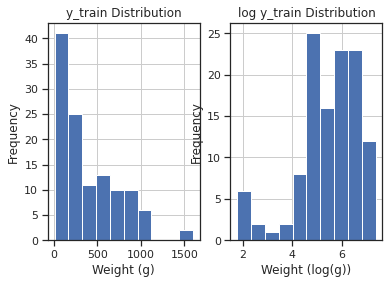

In [ ]:
%pylab inline

fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=False)
y_train.hist(ax=ax1)
ax1.set_title('y_train Distribution')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Frequency')
fig.show()

log_y_train = log(y_train)
log_y_train.hist(ax=ax2)
ax2.set_title('log y_train Distribution')
ax2.set_xlabel('Weight (log(g))')
ax2.set_ylabel('Frequency')

In [ ]:
reg3 = linear_model.LinearRegression()
reg3.fit(X_train,log_y_train)

# The coefficients
print('Coefficients: \n', reg3.coef_)

# The mean absolute error
weight_pred3 = reg3.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, np.exp(weight_pred3)))
print('Coefficient of determination: %.2f' % r2_score(y_test, np.exp(weight_pred3)))

Coefficients: 
 [-0.27939248  0.26780805  0.04439799  0.03536283  0.33396201]
Mean absolute error: 177.96
Coefficient of determination: -0.42


While comparing the linear and log regression models the MAE values seemed to increase a lot after peforming linear regression after taking the log of the weights. Additionally, the coefficient of determination is negative indicating that the log model performs worse than a simple horizontal line and the previous models to the test data.

f.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel = "linear")

selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

print('Features based on rank in descending order:')
rank = pd.DataFrame(selector.ranking_, index = X.columns, columns = ["ranking"])
rank.sort_values(by = 'ranking')

Features based on rank in descending order:


,ranking
Length1,1
Height,2
Width,3
Length2,4
Length3,5


g.

In [ ]:
import copy

df2 = copy.deepcopy(df) 
df2.reset_index(level=0, inplace=True)
df2 = df2.fillna(0)

In [ ]:
df2_species = pd.get_dummies(df2['Species'])
df2_oe = df2.merge(df2_species,left_index=True,right_index=True)
df2_oe = df2_oe.set_index('Species')
df2_oe

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Species,,,,,,,,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0


In [ ]:
X_oe = df2_oe.drop(['Weight'], axis=1)
y_oe = df['Weight']

X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(X_oe, y_oe, test_size=0.25, random_state=50)
reg_oe = linear_model.LinearRegression()
reg_oe.fit(X_train_oe,y_train_oe)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean absolute error
weight_pred_oe = reg_oe.predict(X_test_oe)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test_oe, weight_pred_oe))
print('Coefficient of determination: %.2f' % r2_score(y_test_oe, weight_pred_oe))

Coefficients: 
 [ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]
Mean absolute error: 72.61
Coefficient of determination: 0.94


One-hot encoding produces a higher R^2 and lower MAE on test data compared to the linear regression model obtained by disregarding fish species. However, there is redundancy in the model compared to dummy encoding, which would use n-1 species instead.

# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

1.

Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation] (8pts)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

X_scaled = preprocessing.scale(X)


# scale X
X = pd.DataFrame(StandardScaler().fit_transform(X))

# first steps to setup model
kf = KFold(5)
alphas = 10**np.linspace(10,-2,100)*0.5
lasso_MAE = []
ridge_MAE = []

# running a search in the area
for alpha in alphas:
    lMAE = []
    rMAE = []

    for train_index, test_index in kf.split(X):
        
        # get current KFold sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # lasso model run
        lasso = Lasso(alpha=alpha, random_state=0, max_iter=100000)
        lasso.fit(X_train, y_train)
        y_pred = lasso.predict(X_test)
        llMAE = np.mean(np.abs(y_test-y_pred))
        lMAE += [llMAE]
        
        # ridge model run
        ridge = Ridge(alpha=alpha, random_state=0, max_iter=100000)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        rrMAE = np.mean(np.abs(y_test-y_pred))
        rMAE += [rrMAE]
        
    # capture scores
    lasso_MAE += [np.mean(lMAE)]
    ridge_MAE += [np.mean(rMAE)]

# build a table of results
lassoResults = pd.DataFrame()
lassoResults['Alpha'] = alphas.tolist()
lassoResults['MAE'] = lasso_MAE
ridgeResults = lassoResults.copy()
ridgeResults['MAE'] = ridge_MAE

# Producing the output for  best alphas
lmin = lassoResults['MAE'].idxmin()
rmin = ridgeResults['MAE'].idxmin()

results = pd.DataFrame()
results['Alpha'] = [lassoResults.iloc[lmin,0], ridgeResults.iloc[rmin,0]]
results['MAE'] = [lassoResults.iloc[lmin,1], ridgeResults.iloc[rmin,1]]
results.rename(index={0:'Lasso',1:'Ridge'},inplace=True)

print('Best Regression Alphas')

results


Best Regression Alphas


,Alpha,MAE
Lasso,0.142402,105.337117
Ridge,21.643806,105.990860


2.

Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

In [ ]:
# rest test, train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# get coef
lcoef = []
rcoef = []
for alpha in alphas:
    
    # lasso run
    lasso = Lasso(alpha=alpha, random_state=0, max_iter=100000)
    lasso.fit(X_train, y_train)
    lcoef += [lasso.coef_.tolist()]
        
    # ridge run
    ridge = Ridge(alpha=alpha, random_state=0, max_iter=100000)
    ridge.fit(X_train, y_train)
    rcoef += [ridge.coef_.tolist()]
    
lassoResults['Coef'] = lcoef
ridgeResults['Coef'] = rcoef

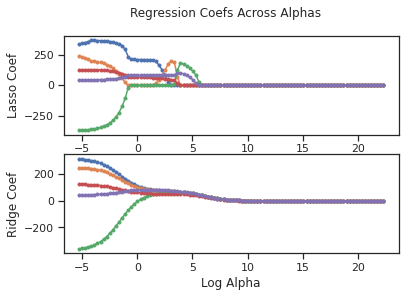

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Regression Coefs Across Alphas')

ax1.plot(np.log(alphas), lcoef, '.-')
ax1.set_ylabel('Lasso Coef')

ax2.plot(np.log(alphas), rcoef, '.-')
ax2.set_xlabel('Log Alpha')
ax2.set_ylabel('Ridge Coef')

plt.show()

3.

Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [ ]:
# setup
score = []
lbalpha = results.iloc[0,0]
rbalpha = results.iloc[1,0]

# regression runs
least = LinearRegression()
lasso = Lasso(alpha=lbalpha, random_state=0, max_iter=100000)
ridge = Ridge(alpha=rbalpha, random_state=0, max_iter=100000)

# fits
least.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# predictions
oy_pred = least.predict(X_test)
ly_pred = lasso.predict(X_test)
ry_pred = ridge.predict(X_test)

In [ ]:
# scores
score += [np.mean(np.abs(y_test-oy_pred))]
score += [np.mean(np.abs(y_test-ly_pred))]
score += [np.mean(np.abs(y_test-ry_pred))]

# output
print('Regression Results')
print('Least: ', score[0])
print('Lasso: ', score[1])
print('Ridge: ', score[2])

Regression Results
Least:  97.81799831813112
Lasso:  97.58792858616123
Ridge:  101.87157310559977


4.

Run lasso again with cross validation using sklearn.linear_model.LassoCV. Set the cross validation parameters as follows:

LassoCV(alphas=None, cv=10, max_iter=10000)
Report the best  𝜆  based on cross validation. Run lasso on the training data using the best  𝜆  and report the coefficeints for all variables. (5pts)

In [ ]:
# find best alpha
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
k_fold = KFold(5)
alphas4 = []
scores4 = []

for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X.iloc[train], y.iloc[train])
    alphas4 += [lasso_cv.alpha_]
    scores4 += [lasso_cv.score(X.iloc[test], y.iloc[test])]
    
# report best alhpa
best = pd.DataFrame()
best['Alphas'] = alphas4
best['Score'] = scores4
bestidx = best['Score'].idxmin()
print(best.iloc[[bestidx]].rename(index={2:'Best'}))

# run on best alpha
lasso = Lasso(alpha=best.iloc[bestidx,0], random_state=0, max_iter=100000)
lasso.fit(X_train, y_train)

# report coef
coefTable = rank.copy()
coefTable['ranking'] = lasso.coef_.tolist()
coefTable.rename(columns={'ranking':'Coef'}, inplace=True)
print(coefTable)

        Alphas     Score
Best  1.198737 -0.283756
               Coef
Length1  210.260003
Length2    1.671426
Length3    0.000000
Height    64.745438
Width     82.125494


5.


We do the scaling to ensure all features have similar influence on the regression and not allowing any one feature or features to dominate the regression because of its large magnitude in its scoring and/or its beta coeffieicents.

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

In [ ]:
## Answer

The lasso regularization would yield more sparse models as compared to the ridge regularization because it sets the coefficients to absolute zero which is not the same for ridge regression. The only difference between lasso and ridge is in the absolute values. Lasso method overcomes the disadvantage of Ridge regression by actually setting them to zero depending on the context and their relevance. Due to this, we can end up with less features at the end which is better for the model and an advantage.